In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [5]:
os.chdir(r'/blue/mbutala/dalverson/data_for_linear_analysis')

In [61]:
import numpy as np
from scipy.optimize import least_squares


def run_least_squares(ground_truth, component, number, q ):
    # Calculate residuals (observed - predicted)
    residuals = ground_truth - component
    # Define the model function for least squares
    def model(x, a, b):
        return a * x + b

    # Define the residual function for least squares
    def residual_func(params, x, y):
        return y - model(x, *params)

    # Initial guess for the parameters (a, b)
    initial_guess = [1, 0]

    # Perform least squares regression
    result = least_squares(residual_func, initial_guess, args=(ground_truth, residuals))

    # Extract the optimized parameters
    a_opt, b_opt = result.x

    # Calculate fitted values
    fitted_values = model(ground_truth, a_opt, b_opt)

    # Quantify the fit using R-squared
    ss_res = np.sum((residuals - fitted_values) ** 2)
    ss_tot = np.sum((residuals - np.mean(residuals)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    print(f"Optimized parameters: a = {a_opt}, b = {b_opt}")
    print(f"R-squared: {r_squared}")

    # # Plot the residuals and the fitted line
    # plt.figure(figsize=(10, 6))
    # plt.scatter(ground_truth, residuals, color='blue', label='Residuals')
    # plt.plot(ground_truth, fitted_values, color='red', label='Fitted Line')
    # plt.axhline(y=0, color='gray', linestyle='--')
    # plt.xlabel('Ground Truth')
    # plt.ylabel('Residuals')
    # plt.title('Least Squares Regression on Residuals on Component {}'.format(number))
    # plt.legend()
    # plt.show()
    
    import matplotlib.pyplot as plt
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes

    # Create main figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the residuals and the fitted line
    ax.scatter(ground_truth, residuals, color='blue', label='Residuals\n R-squared: {:.2f}'.format(r_squared))
    ax.plot(ground_truth, fitted_values, color='red', label='Fitted Line')
    ax.axhline(y=0, color='gray', linestyle='--')
    ax.set_xlabel('Ground Truth')
    ax.set_ylabel('Residuals')
    ax.set_title('Least Squares Regression on Residuals from {}'.format(number))
    ax.legend()

    # Create inset axes
    ax_inset = inset_axes(ax, width="30%", height="30%", loc="center right")  # Adjust size and location

    # Plot the component vs. ground truth in the inset
    #ax_inset.plot(q, ground_truth, color='blue', alpha=0.6)
    ax_inset.plot(q, component, color='green', alpha=0.8)
    ax_inset.set_xlabel(r'$q\ (\mathrm{\AA}^{-1})$', fontsize=8)
    ax_inset.set_ylabel('Instensity', fontsize=8)
    ax_inset.set_title('{}'.format(number), fontsize=10)
    ax_inset.tick_params(axis='both', which='both', labelsize=8)

    plt.show()
    return a_opt, b_opt, r_squared

In [62]:
def read_data(file_name):
    
    # Read the file, skipping comment lines
    data = pd.read_csv(
    file_name,
    comment='#',  # Skip lines starting with '#'
    delim_whitespace=True,  # Handle space-separated values
    names=['r (Å)', 'G (Å⁻²)']  # Column names
)
    
    return data


In [63]:
ground_truth = read_data('experimental_fs_gst_03142024.gr')
light_data = read_data('light_smooth_out.gr')
heavy_data = read_data('heavy_smooth_out.gr')
q = np.array(ground_truth['r (Å)'])
med_data = read_data('med_smooth_out.gr')
sc_substrate_data = read_data('single_crystal_azimuthal_int_out.gr')
fs_substrate_data = read_data('silica_azimuthal_int_out.gr')

In [64]:
ground_truth = np.array(ground_truth['G (Å⁻²)'])
light_data = np.array(light_data['G (Å⁻²)'])
heavy_data = np.array(heavy_data['G (Å⁻²)'])
med_data = np.array(med_data['G (Å⁻²)'])
sc_substrate_data = np.array(sc_substrate_data['G (Å⁻²)'])
fs_substrate_data = np.array(fs_substrate_data['G (Å⁻²)'])

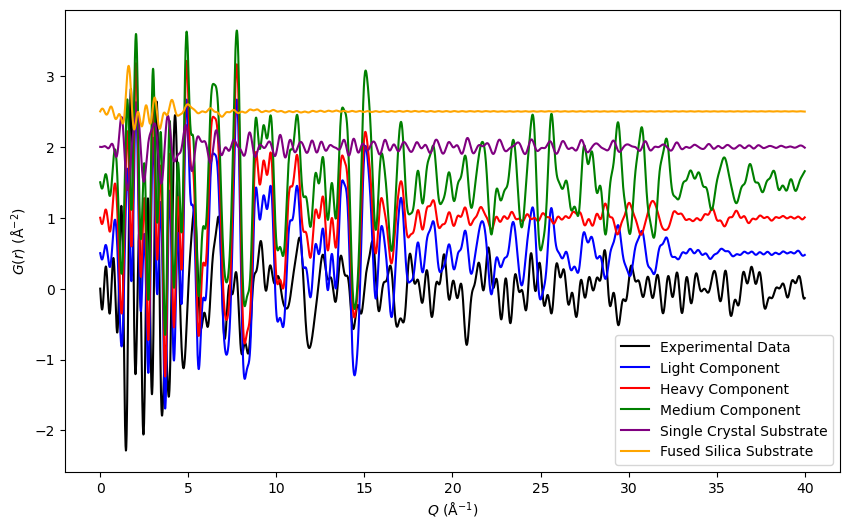

In [65]:
plt.figure(figsize=(10, 6))

plt.plot(q, ground_truth, label='Experimental Data', color='black')
plt.plot(q, light_data +.5, label='Light Component', color='blue')
plt.plot(q, heavy_data+1, label='Heavy Component', color='red')
plt.plot(q, med_data+1.5, label='Medium Component', color='green')
plt.plot(q, sc_substrate_data+2, label='Single Crystal Substrate', color='purple')
plt.plot(q, fs_substrate_data+2.5, label='Fused Silica Substrate', color='orange')

plt.xlabel(r'$Q\ (\mathrm{\AA}^{-1})$')
plt.ylabel(r'$G(r)\ (\mathrm{\AA}^{-2})$')

plt.legend()

Optimized parameters: a = 0.9580495260701725, b = -0.0009742417054532204
R-squared: 0.40053399710543447


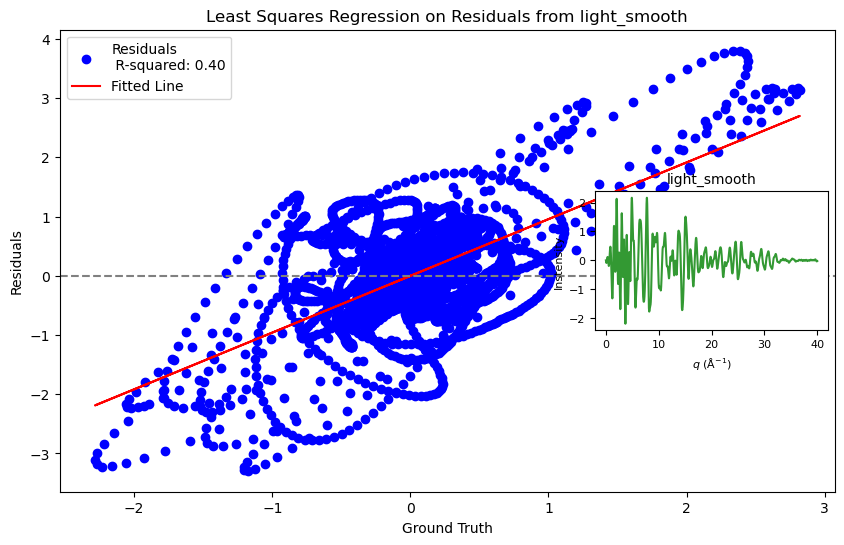

Optimized parameters: a = 0.9517829199557059, b = -0.0008525951879247438
R-squared: 0.42850810470224765


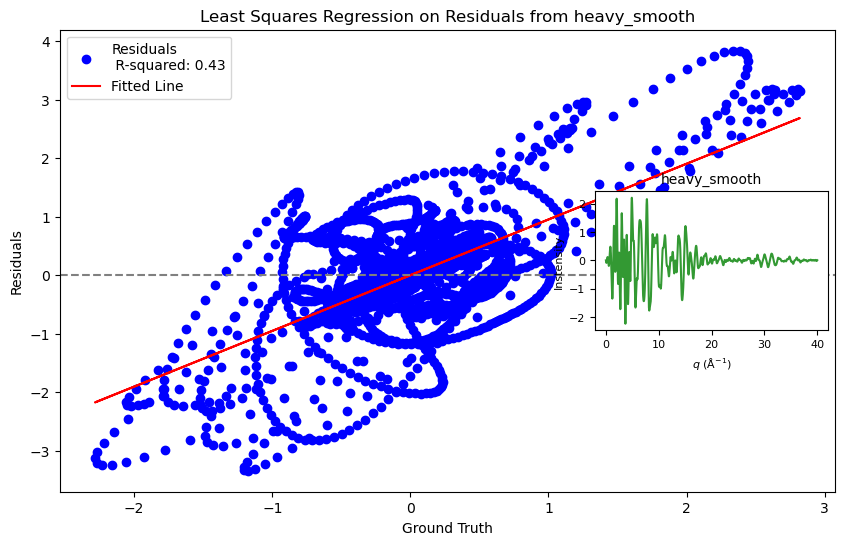

Optimized parameters: a = 0.9661506533828405, b = -0.0006475600876987888
R-squared: 0.37793558448118325


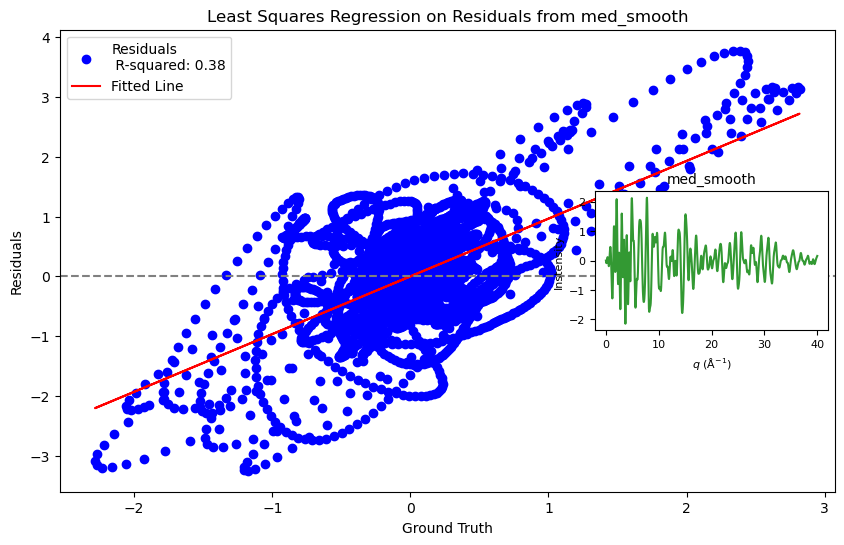

Optimized parameters: a = 0.9900263041395391, b = 1.001599521574432e-05
R-squared: 0.9549011510176253


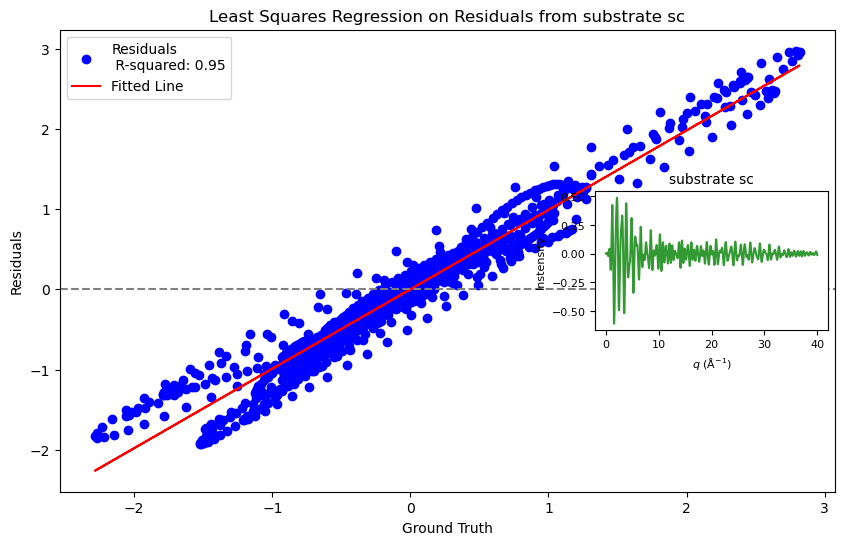

Optimized parameters: a = 0.9833320921177039, b = -0.0003664671797169763
R-squared: 0.9873828846129099


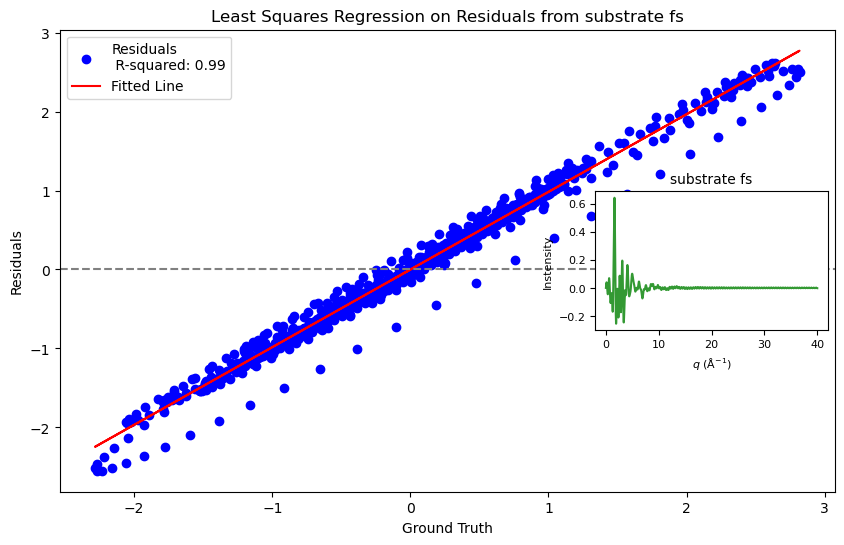

In [66]:
a, b, r_squared = run_least_squares(ground_truth, light_data, 'light_smooth', q)
a, b, r_squared = run_least_squares(ground_truth, heavy_data, 'heavy_smooth', q)
a, b, r_squared = run_least_squares(ground_truth, med_data, 'med_smooth', q)
a, b, r_squared = run_least_squares(ground_truth, sc_substrate_data, 'substrate sc', q)
a, b, r_squared = run_least_squares(ground_truth, fs_substrate_data, 'substrate fs', q)

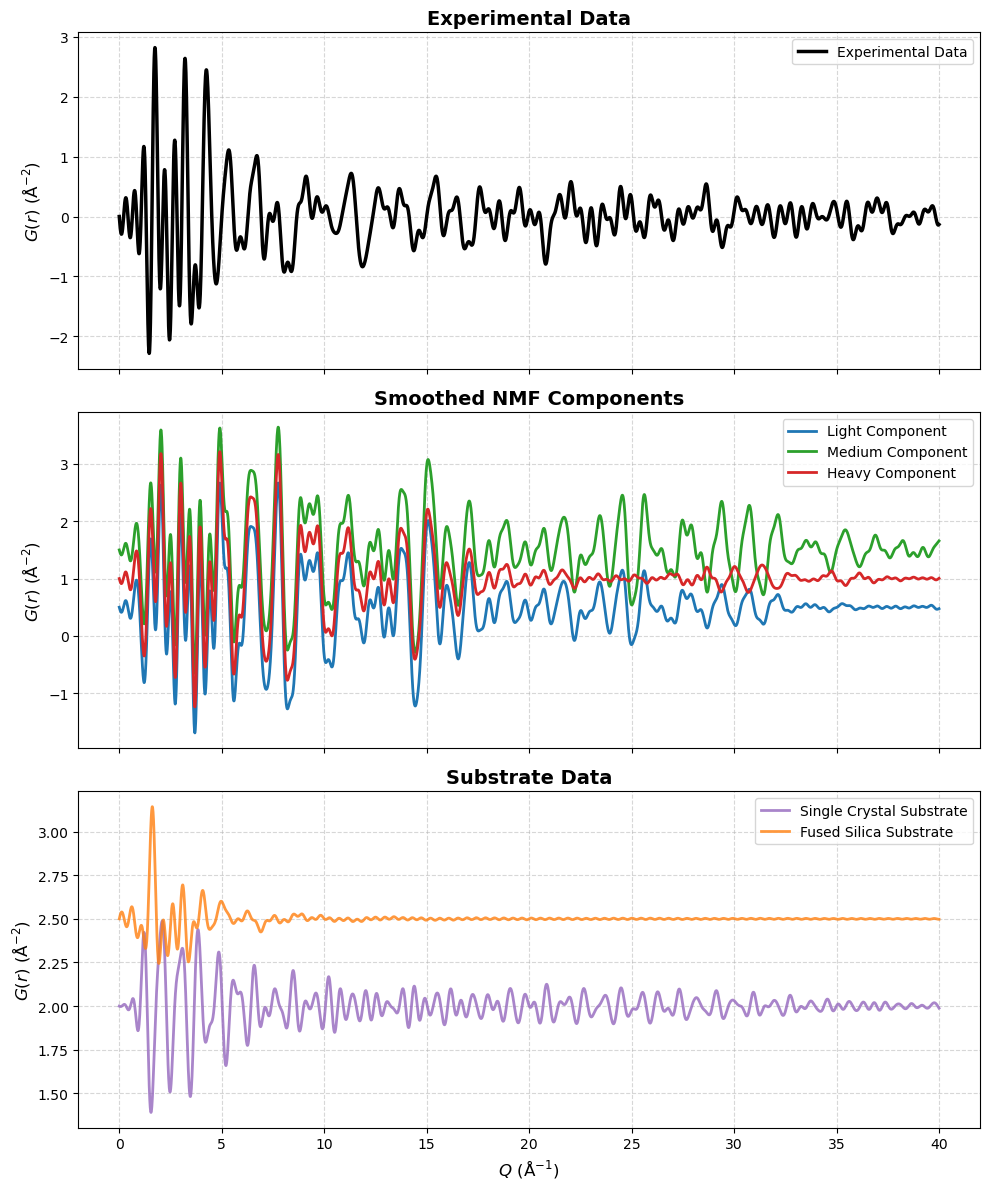

In [70]:
import matplotlib.pyplot as plt

# Create subplots with shared x-axis
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot 1: Ground Truth
axes[0].plot(q, ground_truth, label='Experimental Data', color='black', linewidth=2.5)
axes[0].set_ylabel(r'$G(r)\ (\mathrm{\AA}^{-2})$', fontsize=12)
axes[0].set_title("Experimental Data", fontsize=14, fontweight="bold")
axes[0].legend(loc="upper right", fontsize=10)
axes[0].grid(True, linestyle="--", alpha=0.5)

# Plot 2: Components (Light, Medium, Heavy)
axes[1].plot(q, light_data + 0.5, label='Light Component', color='#1f77b4', linewidth=2)
axes[1].plot(q, med_data + 1.5, label='Medium Component', color='#2ca02c', linewidth=2)
axes[1].plot(q, heavy_data + 1, label='Heavy Component', color='#d62728', linewidth=2)
axes[1].set_ylabel(r'$G(r)\ (\mathrm{\AA}^{-2})$', fontsize=12)
axes[1].set_title("Smoothed NMF Components", fontsize=14, fontweight="bold")
axes[1].legend(loc="upper right", fontsize=10)
axes[1].grid(True, linestyle="--", alpha=0.5)

# Plot 3: Substrates (Single Crystal & Fused Silica)
axes[2].plot(q, sc_substrate_data + 2, label='Single Crystal Substrate', color='#9467bd',  linewidth=2, alpha=0.8)
axes[2].plot(q, fs_substrate_data + 2.5, label='Fused Silica Substrate', color='#ff7f0e',linewidth=2, alpha=0.8)
axes[2].set_xlabel(r'$Q\ (\mathrm{\AA}^{-1})$', fontsize=12)
axes[2].set_ylabel(r'$G(r)\ (\mathrm{\AA}^{-2})$', fontsize=12)
axes[2].set_title("Substrate Data", fontsize=14, fontweight="bold")
axes[2].legend(loc="upper right", fontsize=10)
axes[2].grid(True, linestyle="--", alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


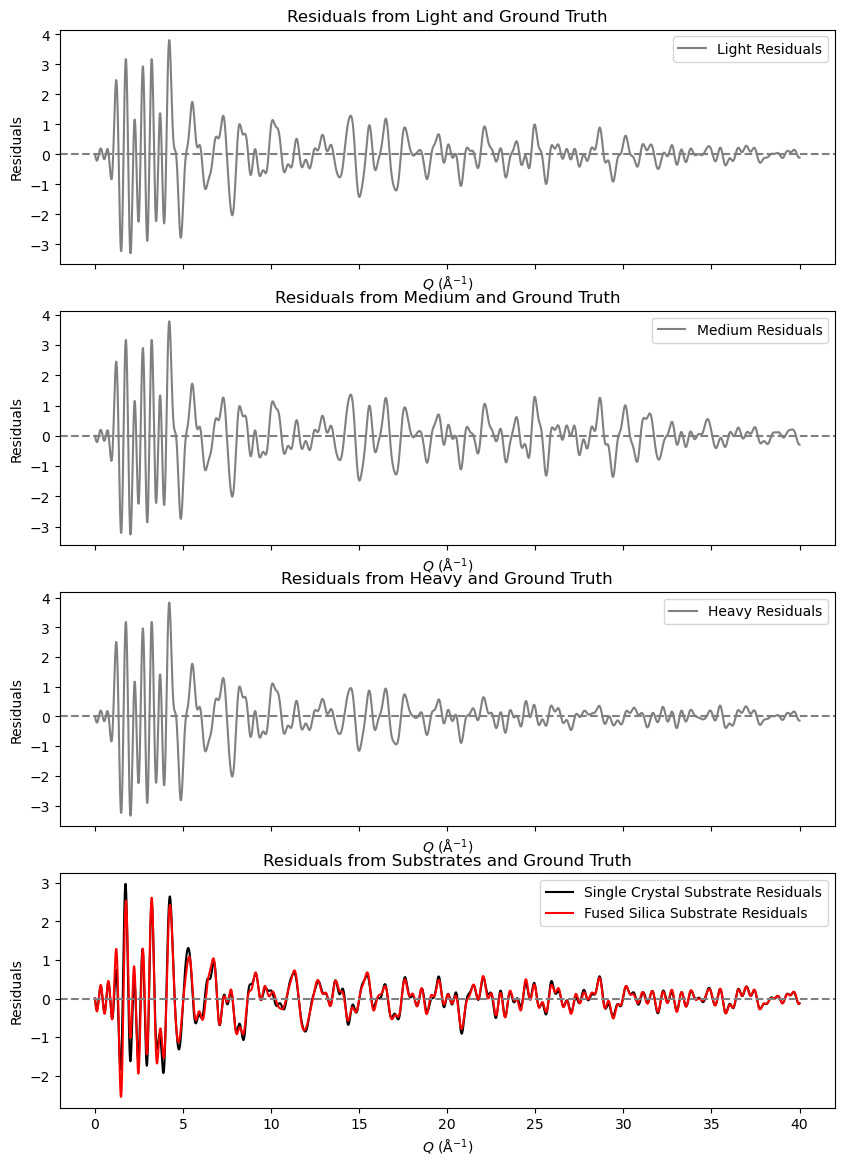

In [81]:
#plot the residuals from the components and the experimental ground truth

# Calculate residuals (observed - predicted)

def cal_residuals(ground_truth, component):
    residuals = ground_truth - component
    return residuals

light_residuals = cal_residuals(ground_truth, light_data)
heavy_residuals = cal_residuals(ground_truth, heavy_data)
med_residuals = cal_residuals(ground_truth, med_data)
sc_substrate_residuals = cal_residuals(ground_truth, sc_substrate_data)
fs_substrate_residuals = cal_residuals(ground_truth, fs_substrate_data)

# Create subplots with shared x-axis
fig, ax = plt.subplots(4, 1, figsize=(10, 14), sharex=True)

ax[0].plot(q, light_residuals, color='gray', label='Light Residuals')
ax[1].plot(q, med_residuals, color='gray', label='Medium Residuals')
ax[2].plot(q, heavy_residuals, color='gray', label='Heavy Residuals')
ax[3].plot(q, sc_substrate_residuals, color='k', label='Single Crystal Substrate Residuals')
ax[3].plot(q, fs_substrate_residuals, color='r', label='Fused Silica Substrate Residuals')
#ax[0].scatter(q, sc_substrate_residuals, color='purple', label='Single Crystal Substrate Residuals')
#ax[0].scatter(q, fs_substrate_residuals, color='orange', label='Fused Silica Substrate Residuals')
ax[0].axhline(y=0, color='gray', linestyle='--')
ax[1].axhline(y=0, color='gray', linestyle='--')
ax[2].axhline(y=0, color='gray', linestyle='--')
ax[3].axhline(y=0, color='gray', linestyle='--')

ax[0].set_xlabel('$Q\ (\mathrm{\AA}^{-1})$')
ax[0].set_ylabel('Residuals')
ax[0].set_title('Residuals from Light and Ground Truth')

ax[1].set_xlabel('$Q\ (\mathrm{\AA}^{-1})$')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Residuals from Medium and Ground Truth')

ax[2].set_xlabel('$Q\ (\mathrm{\AA}^{-1})$')
ax[2].set_ylabel('Residuals')
ax[2].set_title('Residuals from Heavy and Ground Truth')

ax[3].set_xlabel('$Q\ (\mathrm{\AA}^{-1})$')
ax[3].set_ylabel('Residuals')
ax[3].set_title('Residuals from Substrates and Ground Truth')


ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

plt.show()